<img src='https://upload.wikimedia.org/wikipedia/commons/d/d8/Deerfire_high_res_edit.jpg' width='1200px'/>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#Define-the-metrics" data-toc-modified-id="Define-the-metrics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Define the metrics</a></span></li><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dependencies</a></span></li><li><span><a href="#Load-and-describe-data" data-toc-modified-id="Load-and-describe-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load and describe data</a></span></li><li><span><a href="#Missing-value-treatment" data-toc-modified-id="Missing-value-treatment-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Missing value treatment</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Univariate-analysis" data-toc-modified-id="Univariate-analysis-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Univariate analysis</a></span><ul class="toc-item"><li><span><a href="#Let's-begin-with-the-target-variable,-Area" data-toc-modified-id="Let's-begin-with-the-target-variable,-Area-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Let's begin with the target variable, <code>Area</code></a></span></li><li><span><a href="#Independent-columns" data-toc-modified-id="Independent-columns-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Independent columns</a></span></li><li><span><a href="#Categorical-columns" data-toc-modified-id="Categorical-columns-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>Categorical columns</a></span></li><li><span><a href="#Numerical-Columns" data-toc-modified-id="Numerical-Columns-6.1.4"><span class="toc-item-num">6.1.4&nbsp;&nbsp;</span>Numerical Columns</a></span></li></ul></li><li><span><a href="#Bivariate-analysis-with-our-target-variable" data-toc-modified-id="Bivariate-analysis-with-our-target-variable-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Bivariate analysis with our target variable</a></span><ul class="toc-item"><li><span><a href="#Categorical-columns" data-toc-modified-id="Categorical-columns-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Categorical columns</a></span></li><li><span><a href="#Numerical-columns" data-toc-modified-id="Numerical-columns-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Numerical columns</a></span></li></ul></li><li><span><a href="#Multivariate-analysis" data-toc-modified-id="Multivariate-analysis-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Multivariate analysis</a></span></li></ul></li><li><span><a href="#Outlier-treatment" data-toc-modified-id="Outlier-treatment-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Outlier treatment</a></span></li><li><span><a href="#Preparing-the-data-for-modelling" data-toc-modified-id="Preparing-the-data-for-modelling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Preparing the data for modelling</a></span></li><li><span><a href="#Baseline-model---Linear-Regression" data-toc-modified-id="Baseline-model---Linear-Regression-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Baseline model - Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Statistical-approach" data-toc-modified-id="Statistical-approach-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Statistical approach</a></span><ul class="toc-item"><li><span><a href="#Assumptions-of-linear-regression-in-statistics" data-toc-modified-id="Assumptions-of-linear-regression-in-statistics-9.1.1"><span class="toc-item-num">9.1.1&nbsp;&nbsp;</span>Assumptions of linear regression in statistics</a></span></li></ul></li><li><span><a href="#Machine-learning-approach" data-toc-modified-id="Machine-learning-approach-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Machine learning approach</a></span></li></ul></li><li><span><a href="#Improving-Stats-model" data-toc-modified-id="Improving-Stats-model-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Improving Stats model</a></span></li><li><span><a href="#Improving-ML-model" data-toc-modified-id="Improving-ML-model-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Improving ML model</a></span></li></ul></div>

## Objective 

Forest fires help in the natural cycle of woods' growth and replenishment. They Clear dead trees, leaves, and competing vegetation from the forest floor, so new plants can grow. Remove weak or disease-ridden trees, leaving more space and nutrients for stronger trees.


But when fires burn too hot and uncontrollable or when they’re in the “wildland-urban interface” (the places where woodlands and homes or other developed areas meet), they can be damaging and life threatning.


In this kernel, our aim is to predict the burned area (`area`) of forest fires, in the northeast region of Portugal. Based on the the spatial, temporal, and weather variables where the fire is spotted. 

This prediction can be used for calculating the forces sent to the incident and deciding the urgency of the situation.

Further read:
1. [Mylandplan](https://mylandplan.org/content/good-and-bad-forest-fires)
2. [KNIME](https://www.knime.com/knime-applications/forest-fire-prediction)

In [1]:
target = 'area'

## Define the metrics

**RMSE** 

RMSE is the most popular evaluation metric used in regression problems. It follows an assumption that error are unbiased and follow a normal distribution.

Further read: https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/

## Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import statsmodels.api as sm
from scipy.stats import zscore
from statsmodels.stats.stattools import durbin_watson
from sklearn.model_selection import train_test_split,KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

## Load and describe data

In [3]:
path = 'forestfires.csv'
# path = "../input/forest-fires-data-set/forestfires.csv"
df = pd.read_csv(path)

df.shape

(517, 13)

In [4]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


## Missing value treatment

In [6]:
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

## Exploratory Data Analysis
   We will try out the following analysis on our dataset
   - Univariate 
   - Bivariate 
   - Multivariate

In [7]:
plt.rcParams["figure.figsize"] = 9,5

### Univariate analysis



#### Let's begin with the target variable, `Area`

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


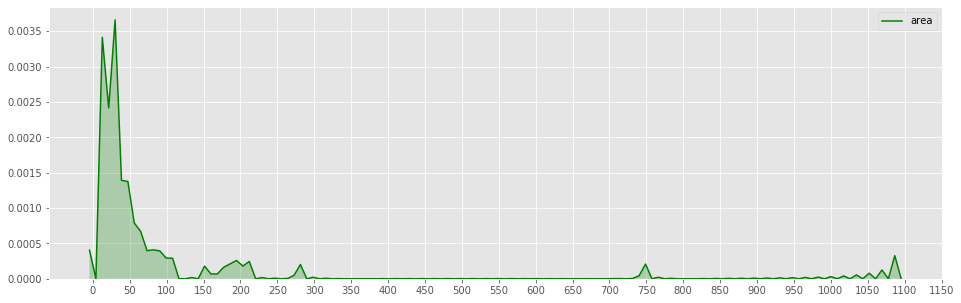

In [8]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df[target].skew()))
print("Kurtosis: {}".format(df[target].kurtosis()))
ax = sns.kdeplot(df[target],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

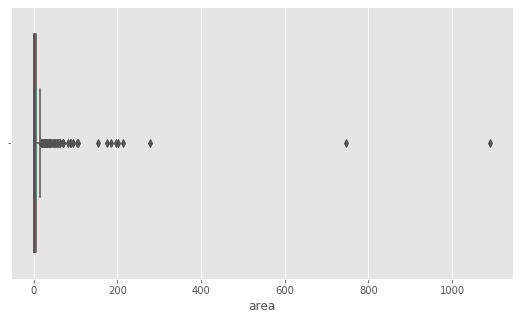

In [9]:
ax = sns.boxplot(df[target])

**Few observations:**

- The data is highly skewed with a value of +12.84 and huge kurtosis value of 194.

- It even tells you that majority of the forest fires do not cover a large area, most of the damaged area is under 50 hectares of land.

- We can apply tranformation to fix the skewnesss and kurtosis, however we will have to inverse transform before submitting the output.

- Outlier Check: There are 4 outlier instances in our area columns but the questions is should we drop it or not? (Will get back to this in the outlier treatment step)

In [10]:
# Outlier points
y_outliers = df[abs(zscore(df[target])) >= 3 ]
y_outliers

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53


#### Independent columns 

In [11]:
dfa = df.drop(columns=target)
cat_columns = dfa.select_dtypes(include='object').columns.tolist()
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

cat_columns,num_columns

(['month', 'day'],
 ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'])

#### Categorical columns 

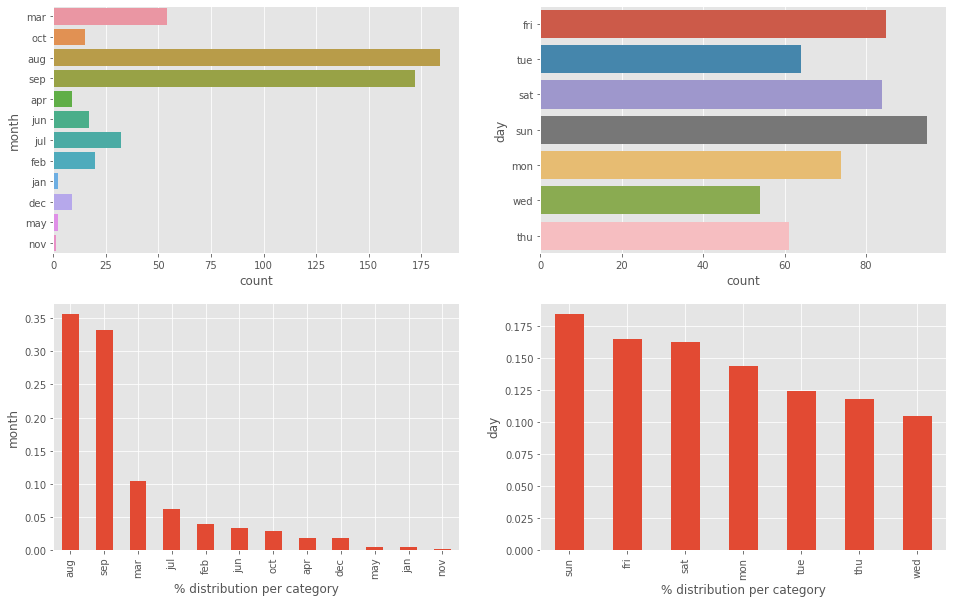

In [12]:
# analyzing categorical columns
plt.figure(figsize=(16,10))
for i,col in enumerate(cat_columns,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.show()    

1. It is interesting to see that abnormally high number of the forest fires occur in the month of `August`
and `September`.

2. In the case of day, the days `Friday` to `Monday` have higher proportion of cases. (However, no strong indicators)

#### Numerical Columns

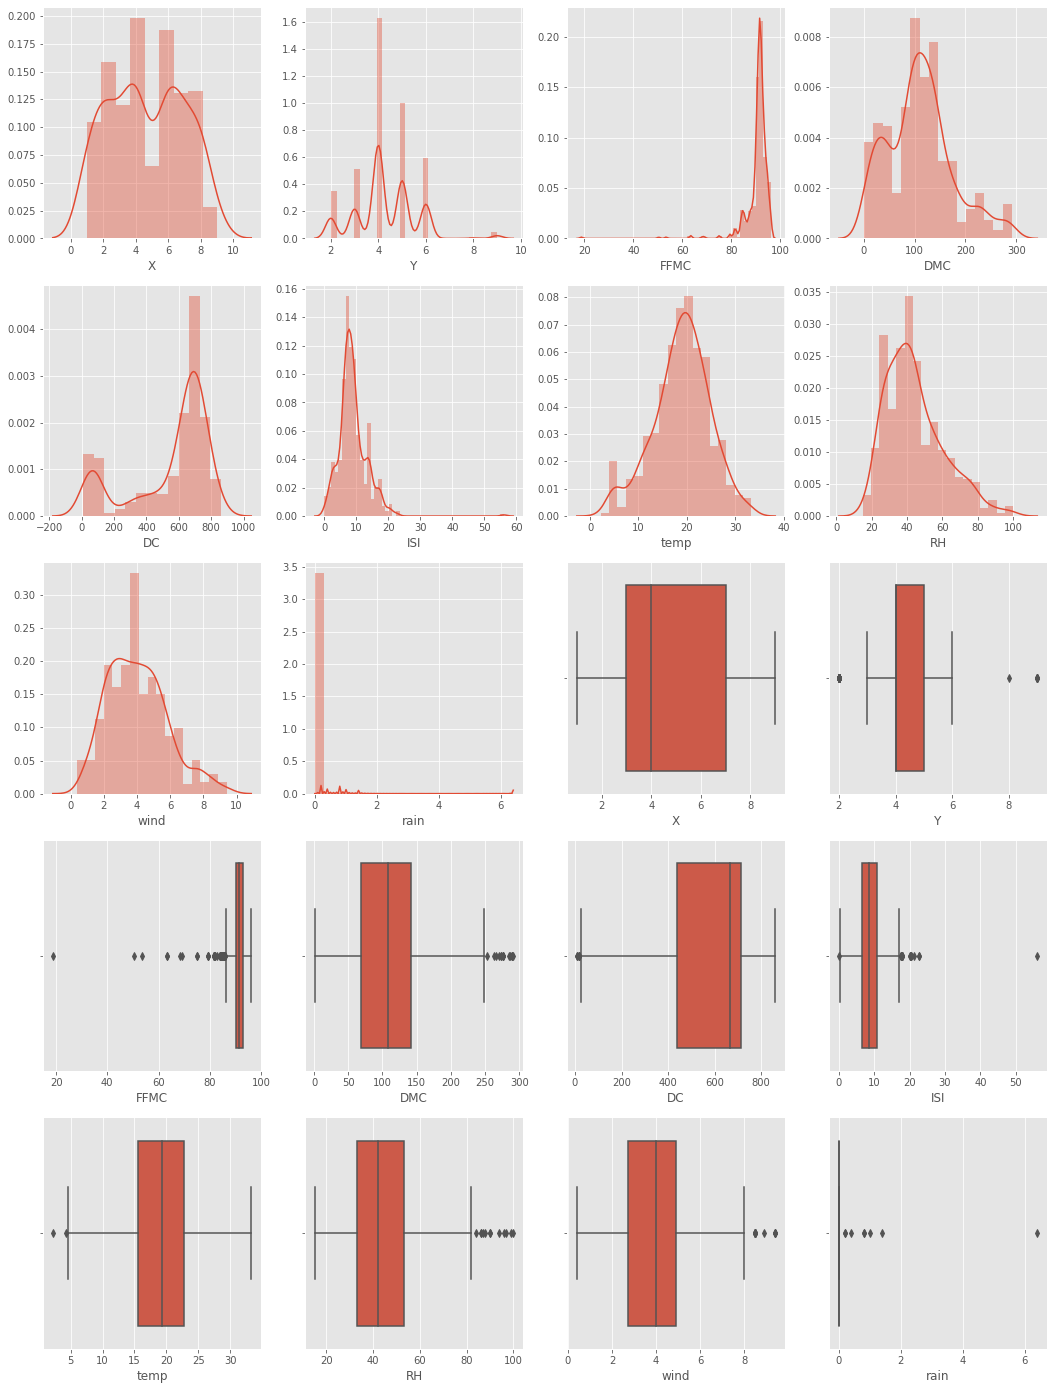

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
skewness,0.036246,0.417296,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344
kurtosis,-1.172331,1.420553,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964


In [13]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.distplot(df[col]);
    plt.subplot(8,4,i+10)
    sns.boxplot(df[col])
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

Outliers, Skewness and kurtosis (high positive or negative) was observed in the following columns:
1. FFMC
2. ISI
3. rain

### Bivariate analysis with our target variable

In [14]:
df['area'].describe(), y_outliers

(count     517.000000
 mean       12.847292
 std        63.655818
 min         0.000000
 25%         0.000000
 50%         0.520000
 75%         6.570000
 max      1090.840000
 Name: area, dtype: float64,
      X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain     area
 237  1  2   sep  tue  91.0  129.5  692.6   7.0  18.8  40   2.2   0.0   212.88
 238  6  5   sep  sat  92.5  121.1  674.4   8.6  25.1  27   4.0   0.0  1090.84
 415  8  6   aug  thu  94.8  222.4  698.6  13.9  27.5  27   4.9   0.0   746.28
 479  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  57   4.9   0.0   278.53)

In [15]:
# a categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage_category
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,No damage
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,No damage
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,No damage
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,No damage
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,No damage


#### Categorical columns

In [16]:
cat_columns

['month', 'day']

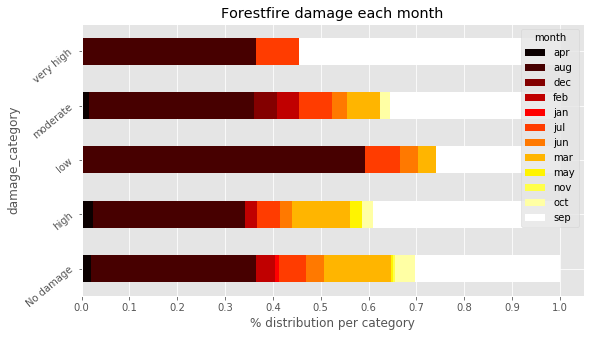

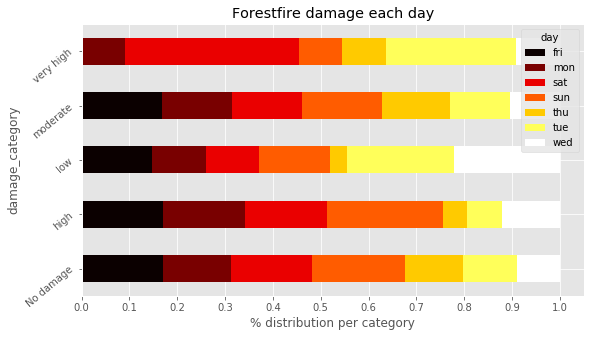

In [17]:
for col in cat_columns:
    cross = pd.crosstab(index=df['damage_category'],columns=df[col],normalize='index')
    cross.plot.barh(stacked=True,rot=40,cmap='hot')
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(0,1.1,0.1))
    plt.title("Forestfire damage each {}".format(col))
#     print(cross)

plt.show()

- Previously we had observed that `August` and `September` had the most number of forest fires. And from the above plot of `month`, we can understand few things
    - Most of the fires in August were low (< 1 hectare).
    - The very high damages(>100 hectares) happened in only 3 months - august,july and september.
 
- Regarding fire damage per day, nothing much can be observed. Except that, there were no ` very high` damaging fires on Friday and on Saturdays it has been reported most.

#### Numerical columns

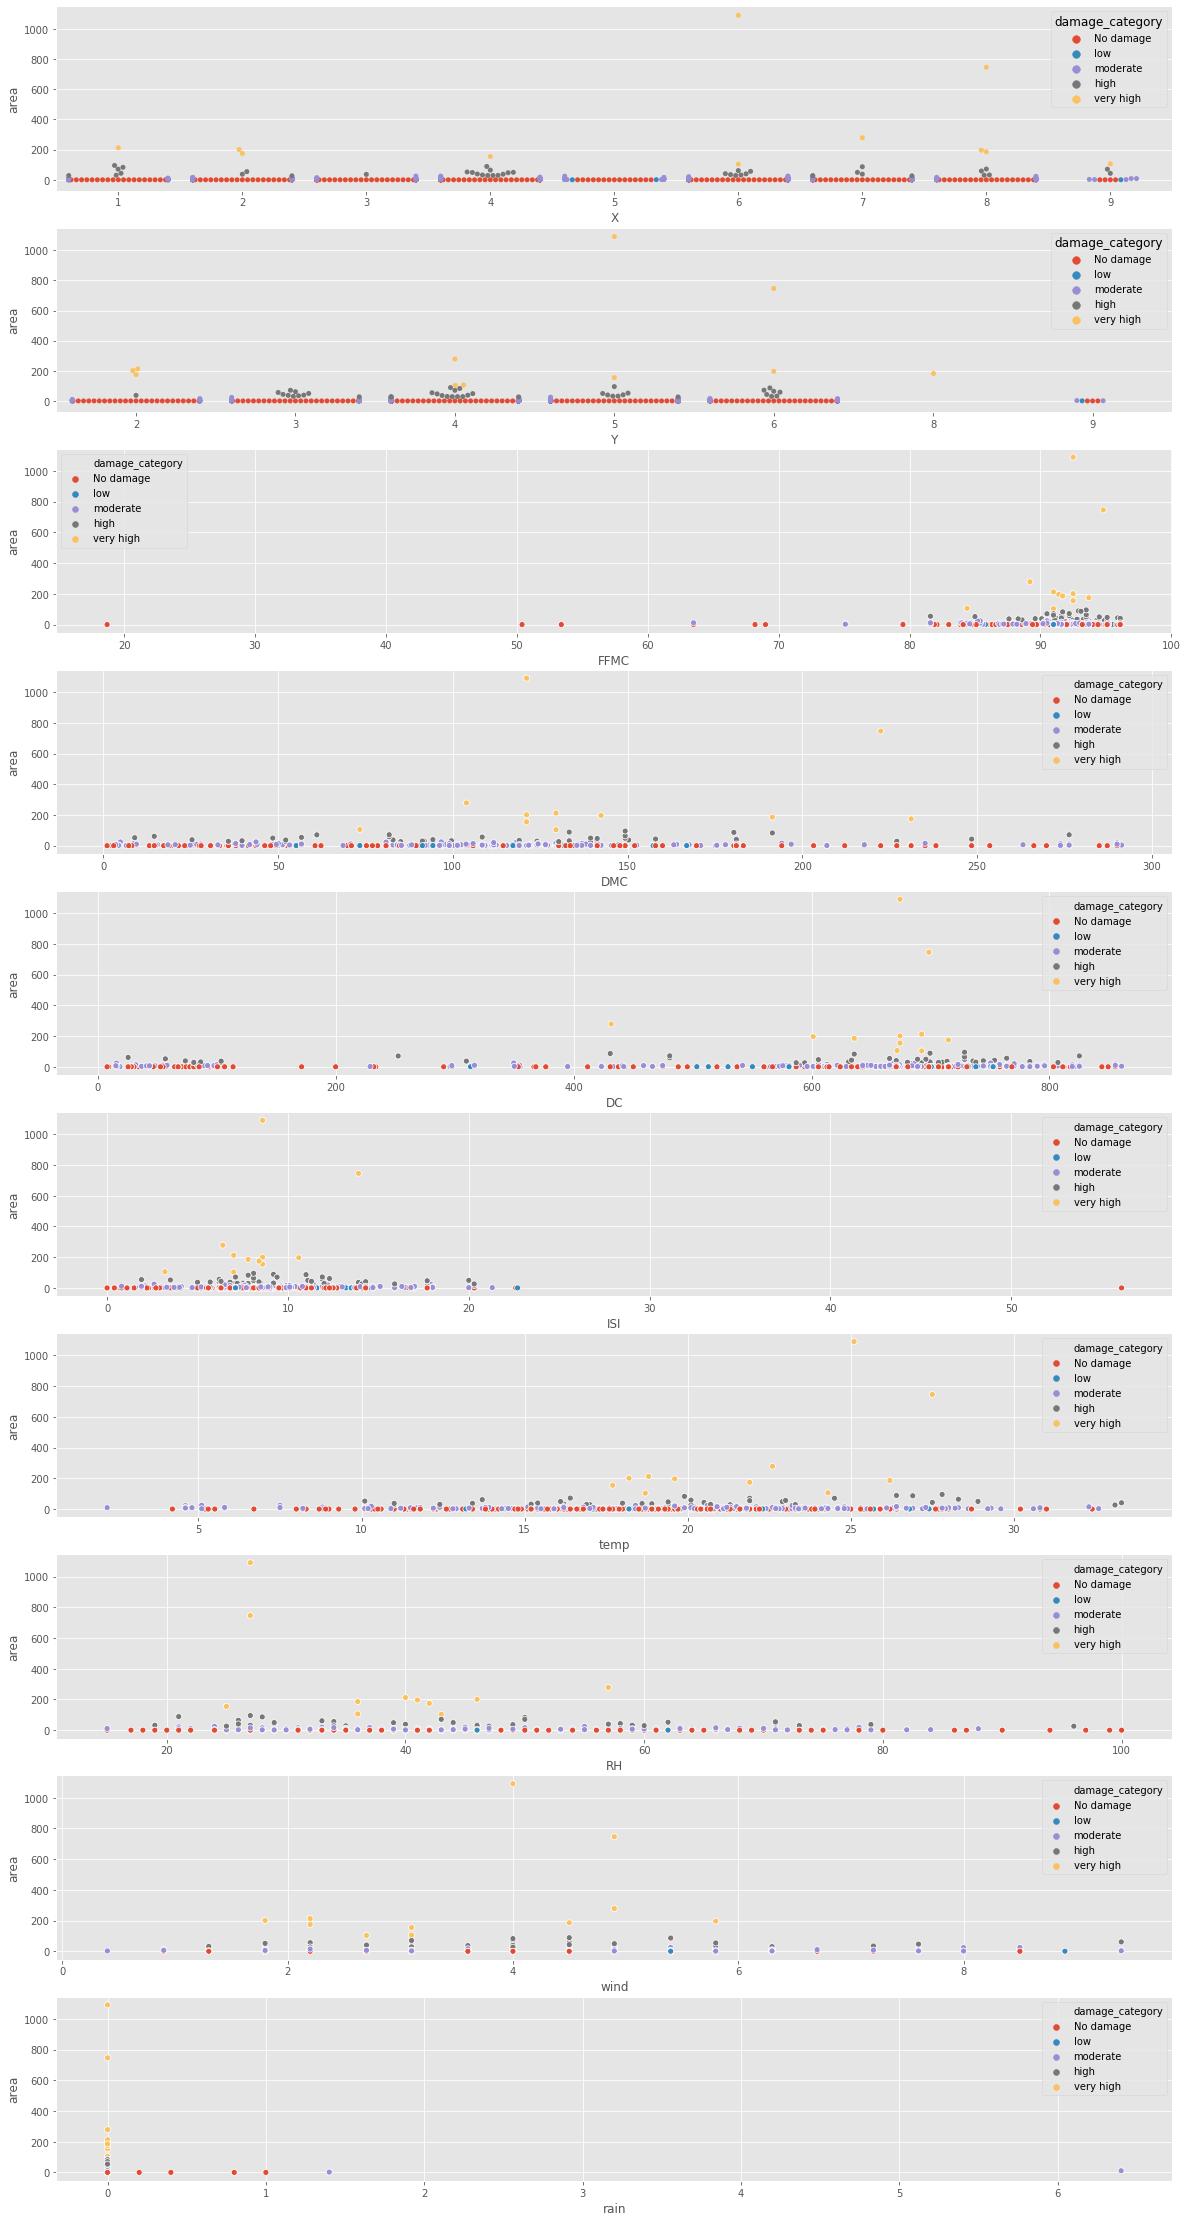

In [18]:
plt.figure(figsize=(20,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(10,1,i)
    if col in ['X','Y']:
        sns.swarmplot(data=df,x=col,y=target,hue='damage_category')
    else:
        sns.scatterplot(data=df,x=col,y=target,hue='damage_category')
plt.show()

### Multivariate analysis

In [19]:
selected_features = df.drop(columns=['damage_category','day','month']).columns
selected_features

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area'],
      dtype='object')

ax = sns.pairplot(df,hue='damage_category',vars=selected_features)

# heatmap
plt.figure(figsize =(16,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

## Outlier treatment

We had observed outliers in the following columns:
1. area 
2. FFMC
2. ISI
3. rain

In [20]:
out_columns = ['area','FFMC','ISI','rain']

However, the above outliers are not error values so we cannot remove it. 

In order to minimize the effect of outliers in our model we will transform the above features. 

Ref: https://humansofdata.atlan.com/2018/03/when-delete-outliers-dataset/

## Preparing the data for modelling
Thing which we can cover here
- Encoding the categorical columns 

In [21]:
df = pd.get_dummies(df,columns=['day','month'],drop_first=True)

- Data transformations like log,inverse,exponential,etc

In [22]:
print(df[out_columns].describe())
np.log1p(df[out_columns]).skew(), np.log1p(df[out_columns]).kurtosis()

              area        FFMC         ISI        rain
count   517.000000  517.000000  517.000000  517.000000
mean     12.847292   90.644681    9.021663    0.021663
std      63.655818    5.520111    4.559477    0.295959
min       0.000000   18.700000    0.000000    0.000000
25%       0.000000   90.200000    6.500000    0.000000
50%       0.520000   91.600000    8.400000    0.000000
75%       6.570000   92.900000   10.800000    0.000000
max    1090.840000   96.200000   56.100000    6.400000


(area     1.217838
 FFMC   -11.675394
 ISI     -0.937218
 rain    14.173028
 dtype: float64, area      0.945668
 FFMC    185.482383
 ISI       2.584588
 rain    234.240025
 dtype: float64)

In [23]:
# FFMC and rain are still having high skew and kurtosis values, 
# since we will be using Linear regression model we cannot operate with such high values
# so for FFMC we can remove the outliers in them using z-score method
mask = df.loc[:,['FFMC']].apply(zscore).abs() < 3

# Since most of the values in rain are 0.0, we can convert it as a categorical column
df['rain'] = df['rain'].apply(lambda x: int(x > 0.0))

df = df[mask.values]
df.shape

(510, 29)

In [24]:
out_columns.remove('rain')
df[out_columns] = np.log1p(df[out_columns])

In [25]:
df[out_columns].skew(), df[out_columns].kurtosis()

(area    1.208492
 FFMC   -1.803993
 ISI    -0.434372
 dtype: float64, area    0.923414
 FFMC    4.866747
 ISI     1.122574
 dtype: float64)

## Baseline model - Linear Regression

**Difference between statistical and machine learning approach**

- Machine learning produces **predictions**.  As far as I can tell, it is not very good at drawing conclusions about general principles based on a set of observations.
- Statistical estimation lets the practitioner make **inferences** (conclusions about a larger set of phenomena based on the observation of a smaller set of phenomena.)  For example, in a regression model the practitioner can estimate the effect of a one unit change in an independent variable X on a dependent variable y.

Further read: https://www.quora.com/When-do-you-use-machine-learning-vs-statistical-regression

In [26]:
X = df.drop(columns=['area','damage_category'])
y = df['area']

### Statistical approach

#### Assumptions of linear regression in statistics

1. Linearity of model
2. Normality of the residuals
3. Homoscedasticity
4. Autocorrelation in Residuals
5. Multicollinearity 

In [27]:
X_constant = sm.add_constant(X)


C:\Users\Tarun\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [28]:
# Build OLS model
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   area   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1.489
Date:                Sat, 16 Nov 2019   Prob (F-statistic):             0.0558
Time:                        15:32:10   Log-Likelihood:                -874.85
No. Observations:                 510   AIC:                             1806.
Df Residuals:                     482   BIC:                             1924.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3192     18.275      0.017      0.986     -35.590      36.228
X              0.0532      0.033      1.621      0.106      -0.011       0.118
Y             -0.0115      0.061     -0.187      0.852      -0.132       0.109
FFMC          -0.1061      4.160     -0.025      0.980      -8.280       8.068
DMC            0.0041      0.002      2.166      0.031       0.000       0.008
DC            -0.0019      0.001     -1.440      0.150      -0.004       0.001
ISI           -0.1039      0.290     -0.358      0.720      -0.674       0.466
temp           0.0443      0.023      1.964      0.050   -2.77e-05       0.089
RH             0.0041      0.007      0.624      0.533      -0.009       0.017
wind           0.0678      0.039      1.719      0.086      -0.010       0.145
rain          -0.9272      0.547     -1.695      0.091      -2.002       0.148
day_mon        0.1076      0.230      0.467      0.641      -0.345       0.560
day_sat        0.3312      0.222      1.493      0.136      -0.105       0.767
day_sun        0.1794      0.215      0.836      0.403      -0.242       0.601
day_thu        0.0714      0.243      0.294      0.769      -0.406       0.549
day_tue        0.3483      0.238      1.464      0.144      -0.119       0.816
day_wed        0.1960      0.248      0.791      0.429      -0.291       0.683
month_aug      0.2450      0.847      0.289      0.772      -1.419       1.909
month_dec      2.2223      0.804      2.764      0.006       0.643       3.802
month_feb      0.2217      0.568      0.391      0.696      -0.894       1.337
month_jan     -0.8605      1.483     -0.580      0.562      -3.775       2.054
month_jul      0.0319      0.731      0.044      0.965      -1.405       1.469
month_jun     -0.3316      0.679     -0.488      0.625      -1.666       1.002
month_mar     -0.2613      0.519     -0.503      0.615      -1.282       0.759
month_may      0.6256      1.106      0.565      0.572      -1.548       2.800
month_nov     -1.1779      1.490     -0.790      0.430      -4.106       1.750
month_oct      0.7718      1.005      0.768      0.443      -1.203       2.747
month_sep      0.8978      0.949      0.946      0.345      -0.967       2.762
==============================================================================
Omnibus:                       76.076   Durbin-Watson:                   0.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.018
Skew:                           1.074   Prob(JB):                     5.77e-24
Kurtosis:                       3.652   Cond. No.                     1.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+05. This might i

# 1. Linearity of model


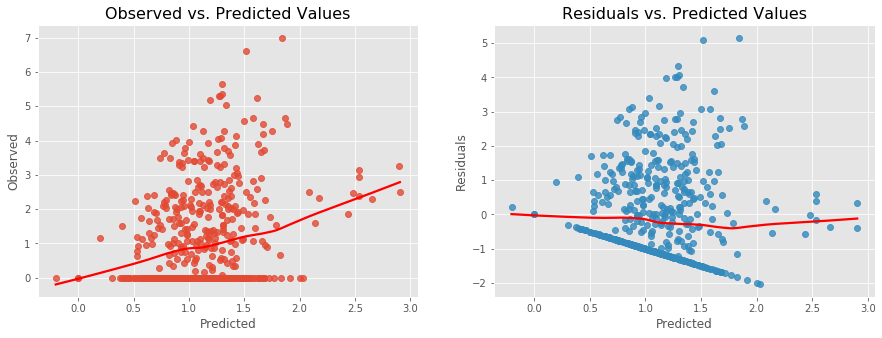

In [29]:
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2,figsize=(15,5))
    
    
    
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y) 

- By observing  the plots the linearity assumption is not there 

- Adding new features might result in linearity of model 
 

# 2. Normality of the residuals


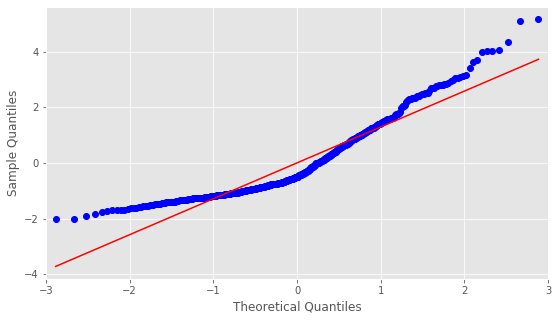

In [30]:
sm.qqplot(lin_reg.resid,line ='r')
plt.show()

- we can improve the normality of residuals by removing the outliers
    - but in our probelm we need the outliers because of its feature importance

# Expectation Mean of residual is zero

In [31]:
lin_reg.resid.mean()

-2.19824158875781e-15

- Very much close to zero, we can assume mean of residual is zero

# 3. Homoscedasticity


[('F statistic', 0.9005330268628142), ('p-value', 0.7860123901512497)]

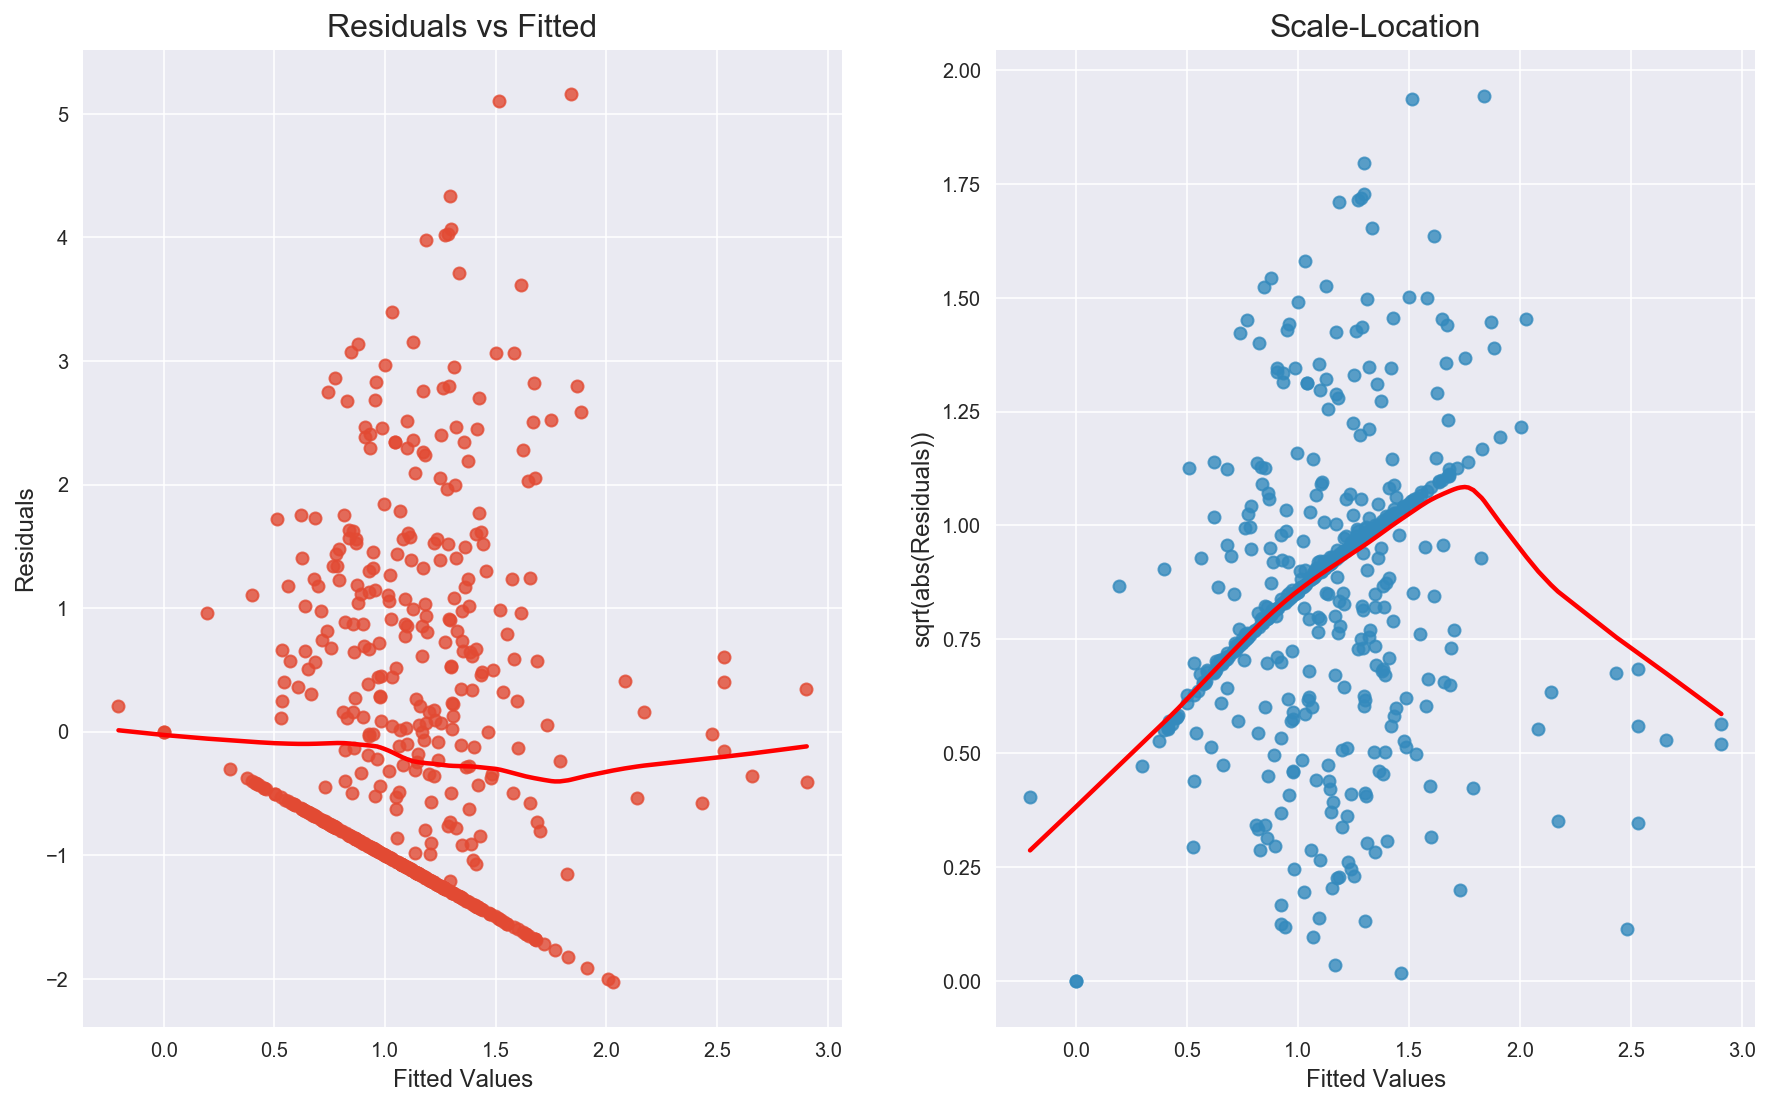

In [32]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = lin_reg
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

- To identify homoscedasticity in the plots, the placement of the points should be random and no pattern (increase/decrease in values of residuals) should be visible and P-Values should be less than 0.05 
- In the plots we can see there are paticular patterns and P-Values is also greater than 0.05 ,so we can say that there is no homoscedasticity 

# 4. Autocorrelation in Residuals


C:\Users\Tarun\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


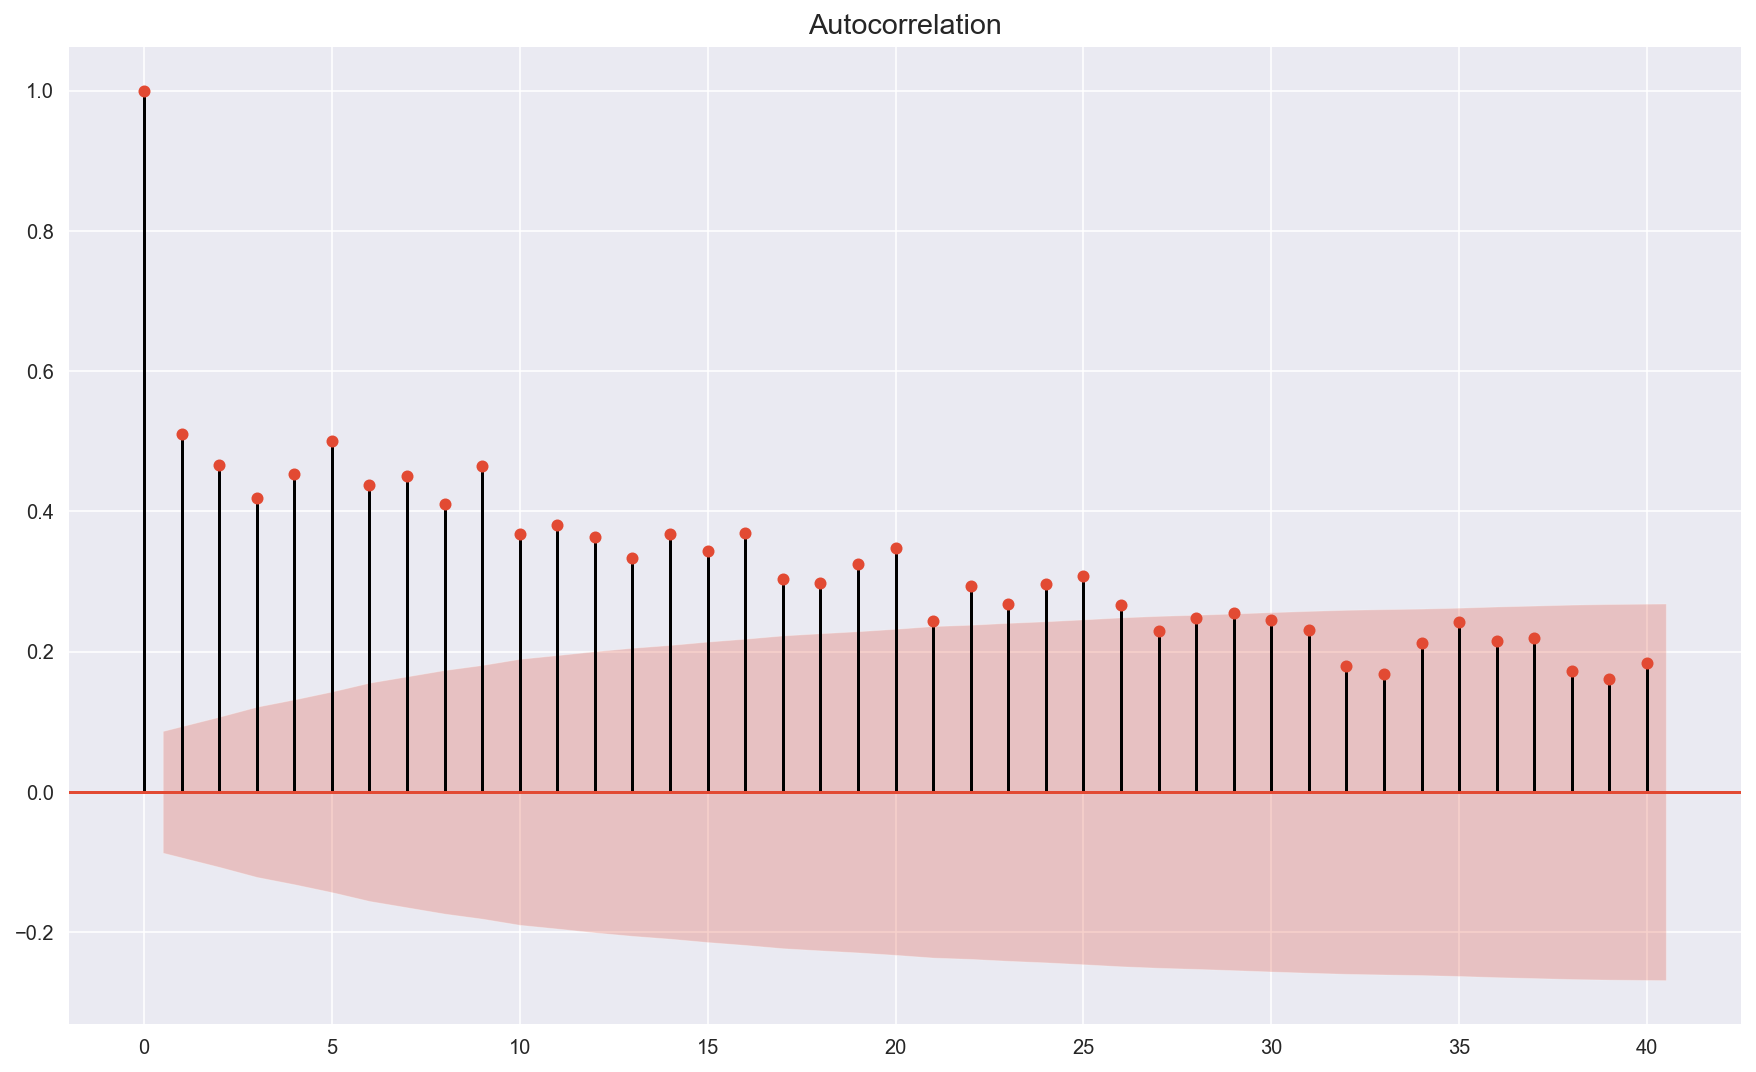

In [33]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)
acf.show()

- By observing the above data we can say that there is positive autocorrelation is present , we can reduce it by using fine tuning of parameters

# 5. Multicollinearity 

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
X,1.539358
Y,1.521475
FFMC,5.629386
DMC,3.978913
DC,26.792896
ISI,4.107793
temp,4.535721
RH,2.870672
wind,1.323007
rain,1.231386


- there is multicollinearity present between some features where vif >5.
- To deal with multicollinearity we should iteratively remove features with high values of VIF.


### Machine learning approach

In [35]:
# Basic model

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [ 5.31606969e-02 -1.14568556e-02 -1.06058069e-01  4.14949277e-03
 -1.85357656e-03 -1.03922358e-01  4.42966290e-02  4.06262834e-03
  6.77745607e-02 -9.27224979e-01  1.07571833e-01  3.31166849e-01
  1.79442185e-01  7.13642262e-02  3.48267729e-01  1.96002473e-01
  2.44968196e-01  2.22228086e+00  2.21675689e-01 -8.60523500e-01
  3.19480980e-02 -3.31633319e-01 -2.61303606e-01  6.25607286e-01
 -1.17785330e+00  7.71840522e-01  8.97800363e-01]
Intercept: 0.3192068355158235
R^2 score: 0.0769861533829217


## Improving Stats model

In [30]:
# Using p-value and variable inflation factor

In [39]:
df.drop(['DC','FFMC','ISI','month_aug','month_sep','month_jul','month_oct'],axis=1,inplace =True)


In [40]:
X = df.drop(columns=['area','damage_category'])
y = df['area']

In [41]:
X_constant =sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

C:\Users\Tarun\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   area   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.500
Date:                Sat, 16 Nov 2019   Prob (F-statistic):             0.0758
Time:                        15:41:20   Log-Likelihood:                -880.10
No. Observations:                 510   AIC:                             1802.
Df Residuals:                     489   BIC:                             1891.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0951      0.651     -0.146      0.884      -1.374       1.184
X              0.0503      0.032      1.554      0.121      -0.013       0.114
Y             -0.0024      0.061     -0.039      0.969      -0.122       0.117
DMC            0.0016      0.001      1.195      0.233      -0.001       0.004
temp           0.0232      0.020      1.145      0.253      -0.017       0.063
RH             0.0003      0.006      0.046      0.964      -0.012       0.012
wind           0.0542      0.038      1.432      0.153      -0.020       0.128
rain          -0.9731      0.537     -1.812      0.071      -2.028       0.082
day_mon        0.0830      0.227      0.365      0.715      -0.363       0.529
day_sat        0.2800      0.219      1.275      0.203      -0.151       0.711
day_sun        0.1472      0.212      0.695      0.487      -0.269       0.563
day_thu        0.0078      0.238      0.033      0.974      -0.461       0.476
day_tue        0.2812      0.234      1.201      0.230      -0.179       0.741
day_wed        0.1002      0.246      0.408      0.684      -0.382       0.583
month_dec      1.7821      0.589      3.026      0.003       0.625       2.939
month_feb      0.4120      0.383      1.076      0.282      -0.340       1.164
month_jan     -0.5944      1.424     -0.417      0.677      -3.393       2.204
month_jun     -0.2859      0.362     -0.789      0.430      -0.998       0.426
month_mar     -0.0860      0.268     -0.320      0.749      -0.614       0.442
month_may      0.9089      1.004      0.906      0.366      -1.063       2.881
month_nov     -1.0119      1.420     -0.713      0.476      -3.801       1.778
==============================================================================
Omnibus:                       87.168   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.368
Skew:                           1.162   Prob(JB):                     8.09e-29
Kurtosis:                       3.830   Cond. No.                     3.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Improving ML model

In [37]:
# Feature Selection techniques - RFE, forward or backward selection

In [42]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [ 5.02837933e-02 -2.38066538e-03  1.58362045e-03  2.32402739e-02
  2.76689056e-04  5.41513159e-02 -9.73065520e-01  8.29500822e-02
  2.79951715e-01  1.47187992e-01  7.80901070e-03  2.81217574e-01
  1.00186633e-01  1.78207221e+00  4.12023928e-01 -5.94384719e-01
 -2.85942765e-01 -8.59783119e-02  9.08856337e-01 -1.01192712e+00]
Intercept: -0.09509559408337842
R^2 score: 0.057800135929896745
